<a href="https://colab.research.google.com/github/AmrAymanKhalil505/Machine-Learning-Notebooks/blob/master/Binary%20Re-identification(testing%20if%20two%20photos%20belong%20to%20the%20same%20person).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# first thing is to have access to the drive and test if the files are there 
# second use pickle package to make methods that loads and saves history and the models in the drive 
 # third create and load the target model 
 # training is done on two cells one ran 50 epoch but stopped due to mistake in the path of saving the history and the model
# next I re ran the code again after fixing the path for 250 epoch and each 50 I save the current model and the history
 # so 5 models were saved in addition to the model weights saved by checkpoints 
# best model states  loss: 0.1388 - acc: 0.9503 - val_loss: 0.2182 - val_acc: 0.9496 and included in the submission
 # evaluate model 
# [0.1297023490164065, 0.9651162782380748] for loss and  accuracy
# 5 diagrams are included each represent 50 epoch each to show in total 250 epoch
# steps per epoch and validation steps were number of photos / batch size in both
# we use sample-wise normalization as our way of standardization
# validation split was 0.2 of the training data  


# the results shows how good is the Conv Nets in detecting features of photos even on a small data set of 3000-4000 photos 
# the project was a good way to deal with data sets although small yet can't be loaded into the memory 

In [0]:
#!ls "/content/drive/My Drive"
# !ls "/content/drive/My Drive/GUC/Semester 9/ML/Project 3"
# !ls "/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID"
# !ls "/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID/Data"
# !ls "/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID/Data/train"
# !ls "/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID/Data/test"
# !ls "/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID/Weights"
!ls "/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/final"
!ls "/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/finalModels"

weights-improvement-01-0.69.hdf5  weights-improvement-08-0.80.hdf5
weights-improvement-07-0.76.hdf5  weights-improvement-19-0.86.hdf5


In [0]:
import pickle

def pickleSaveFile(Path,fileToDump):
  pickle_out = open(Path,"wb")
  pickle.dump(fileToDump, pickle_out)
  pickle_out.close()
def pickleLoadFile(Path):
  pickle_in = open(Path,"rb")
  return pickle.load(pickle_in)
  

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

filepath="/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/final/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Specify the input shape to the first convolutional layer
input_shape = (120, 160, 3)
nClasses = 2
def createModel():
    model = Sequential()
    # a convolution layer of 32 features of size 3x3 with relu activation and zero padding
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    # a convolution layer of 32 features of size 3x3 with relu activation
    model.add(Conv2D(32, (3, 3), activation='relu'))
    # a batch normalization layer
    model.add(BatchNormalization())
    # maxpooling layer of filter size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # a convolution layer of 64 features of size 3x3 with relu activation and zero padding
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    # a convolution layer of 64 features of size 3x3 with relu activation
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # a batch normalization layer
    model.add(BatchNormalization())
    # maxpooling layer of filter size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # a convolution layer of 64 features of size 3x3 with relu activation and zero padding
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    # a convolution layer of 64 features of size 3x3 with relu activation
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # a batch normalization layer
    model.add(BatchNormalization())
    # maxpooling layer of filter size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # a dropout layer of 50%
    model.add(Dropout(0.5))
    
    # flatten the output of the previous layer
    model.add(Flatten())
    # add a dense layer that outputs 512 units and apply relu activation
    model.add(Dense(512, activation='relu'))
    # a dropout layer of 50%
    model.add(Dropout(0.5))
    # add a dense layer with a softmax activation to classify the images
    model.add(Dense(nClasses, activation='softmax'))
     
    return model
  
model1 = createModel()
model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.load_weights("/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID/Weights/weights.hdf5")


Using TensorFlow backend.


In [0]:
batch_size = 32
epochs = 50

model1.load_weights("/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/final/weights-improvement-40-0.91.hdf5")
datagen = ImageDataGenerator(
        samplewise_std_normalization=True,
        zoom_range=0.2, # randomly zoom into images
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True ,
        validation_split=0.2)  # randomly flip images
train_generator = datagen.flow_from_directory(
        '/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID/Data/train',
        target_size=(120,160),
        batch_size=batch_size,
        color_mode='rgb',
        shuffle=True,
        class_mode='binary',
        subset="training")

validation_generator = datagen.flow_from_directory(
        '/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID/Data/train',
        target_size=(120,160),
        batch_size=batch_size,
        color_mode='rgb',
        shuffle=True,
        class_mode='binary',
        subset="validation")
for i in range(20):
  history2 = model1.fit_generator(
          train_generator,
          steps_per_epoch=3098/batch_size,# this should be 3098 / 32 to get the 96 epoch this was noticed after running the code instead of 96 we used 90
          epochs=epochs,
          callbacks= callbacks_list,
          validation_data=validation_generator,
          validation_steps=774/batch_size)# this should be 774 / 32 tp get 24 instead 30 was used 
  pickleSaveFile("/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/finalModels/hist"+str(i+1)+".pickle",history2)
  model1.save_weights("/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/finalModels/model"+str(i+1)+".hdf5")

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:855: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3098 images belonging to 2 classes.
Found 774 images belonging to 2 classes.
Epoch 1/50
97/96 [==============================] - 993s 10s/step - loss: 0.5238 - acc: 0.8372 - val_loss: 0.7548 - val_acc: 0.8127

Epoch 00001: val_acc improved from -inf to 0.81266, saving model to /content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/final/weights-improvement-01-0.81.hdf5
Epoch 2/50
97/96 [==============================] - 33s 343ms/step - loss: 0.5136 - acc: 0.8494 - val_loss: 0.7282 - val_acc: 0.7339

Epoch 00002: val_acc did not improve from 0.81266
Epoch 3/50
97/96 [==============================] - 34s 346ms/step - loss: 0.4466 - acc: 0.8641 - val_loss: 0.5639 - val_acc: 0.8230

Epoch 00003: val_acc improved from 0.81266 to 0.82300, saving model to /content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/final/weights-improvement-03-0.82.hdf5
Epoch 4/50
97/96 [==============================] - 34s 347ms/step - loss: 0.4209 - acc: 0.8653 - val_loss: 1.4877 

TypeError: ignored

In [0]:
batch_size = 32
epochs = 50

model1.load_weights("/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/final/weights-improvement-40-0.91.hdf5")
datagen = ImageDataGenerator(
        samplewise_std_normalization=True,
        zoom_range=0.2, # randomly zoom into images
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True ,
        validation_split=0.2)  # randomly flip images
train_generator = datagen.flow_from_directory(
        '/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID/Data/train',
        target_size=(120,160),
        batch_size=batch_size,
        color_mode='rgb',
        shuffle=True,
        class_mode='binary',
        subset="training")

validation_generator = datagen.flow_from_directory(
        '/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID/Data/train',
        target_size=(120,160),
        batch_size=batch_size,
        color_mode='rgb',
        shuffle=True,
        class_mode='binary',
        subset="validation")
for i in range(5):
  history2 = model1.fit_generator(
          train_generator,
          steps_per_epoch=3098/batch_size,# this should be 3098 / 32 to get the 96 epoch this was noticed after running the code instead of 96 we used 90
          epochs=epochs,
          callbacks= callbacks_list,
          validation_data=validation_generator,
          validation_steps=774/batch_size)# this should be 774 / 32 tp get 24 instead 30 was used 
  pickleSaveFile("/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/finalModels/hist"+str(i+1)+".pickle",history2)
  model1.save_weights("/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/finalModels/model"+str(i+1)+".hdf5")

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:855: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3098 images belonging to 2 classes.
Found 774 images belonging to 2 classes.
Epoch 1/50
97/96 [==============================] - 1357s 14s/step - loss: 0.3786 - acc: 0.8854 - val_loss: 0.4515 - val_acc: 0.8876

Epoch 00001: val_acc improved from -inf to 0.88760, saving model to /content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/final/weights-improvement-01-0.89.hdf5
Epoch 2/50
97/96 [==============================] - 33s 337ms/step - loss: 0.3364 - acc: 0.8956 - val_loss: 0.5573 - val_acc: 0.8760

Epoch 00002: val_acc did not improve from 0.88760
Epoch 3/50
97/96 [==============================] - 32s 331ms/step - loss: 0.3665 - acc: 0.8968 - val_loss: 4.1657 - val_acc: 0.6253

Epoch 00003: val_acc did not improve from 0.88760
Epoch 4/50
97/96 [==============================] - 32s 331ms/step - loss: 0.4127 - acc: 0.8933 - val_loss: 2.1031 - val_acc: 0.6964

Epoch 00004: val_acc did not improve from 0.88760
Epoch 5/50
97/96 [==============================] - 33s 3

In [0]:
model1.load_weights("/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/final/weights-improvement-08-0.95.hdf5")

testGen = ImageDataGenerator(
        samplewise_std_normalization=True,
        zoom_range=0.2, # randomly zoom into images
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
test_generator = testGen.flow_from_directory(
        '/content/drive/My Drive/GUC/Semester 9/ML/Project 3/BinaryReID/Data/test',
        target_size=(120,160),
        batch_size=batch_size,
        color_mode='rgb',
        shuffle=True,
        class_mode='binary')


pred=model1.evaluate_generator(test_generator,
                              steps=860/batch_size
                              ,verbose=1)
print(pred)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:855: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 860 images belonging to 2 classes.
27/26 [==============================] - 7s 271ms/step
[0.1297023490164065, 0.9651162782380748]


In [0]:
print (model1.metrics_names)

['loss', 'acc']


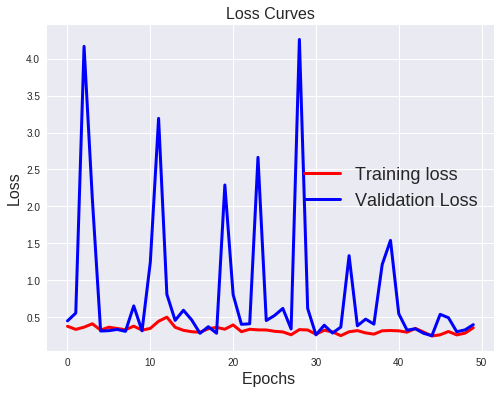

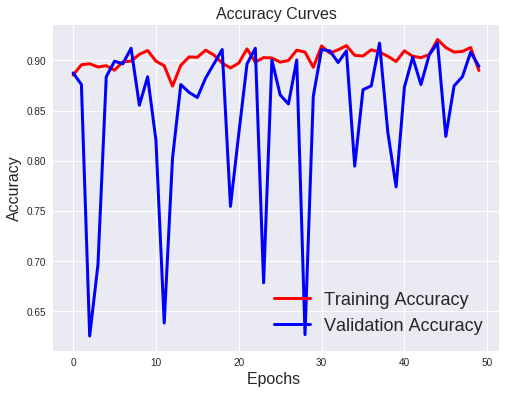

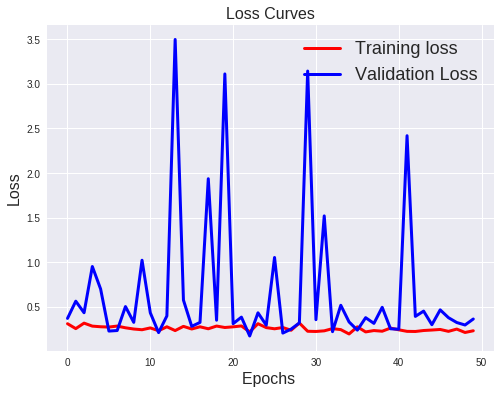

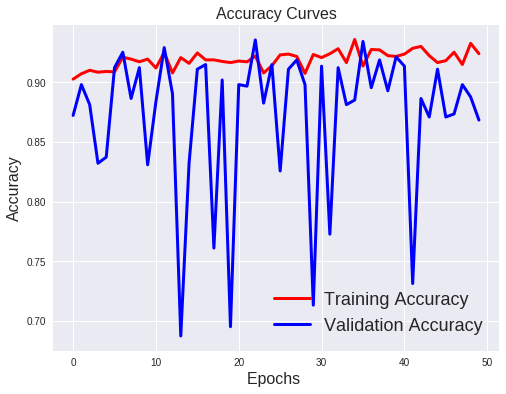

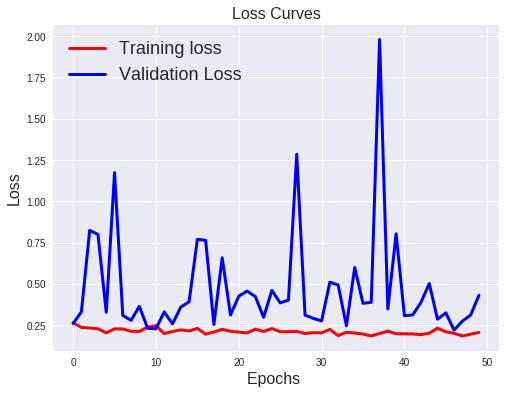

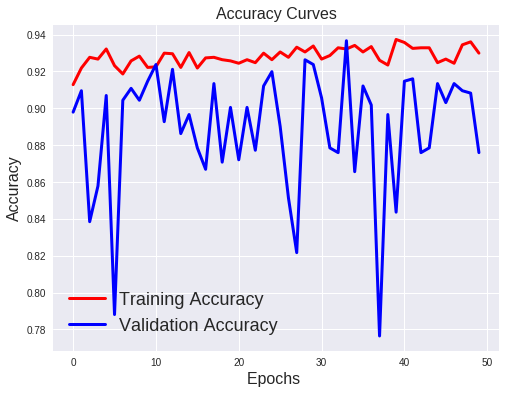

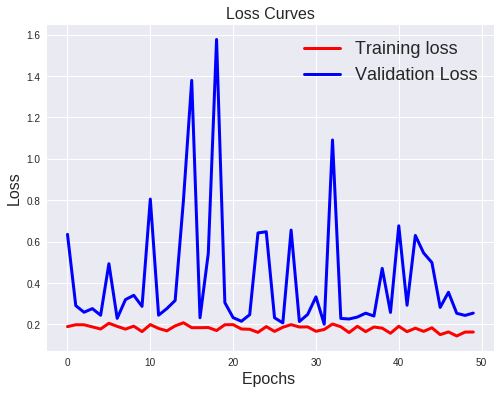

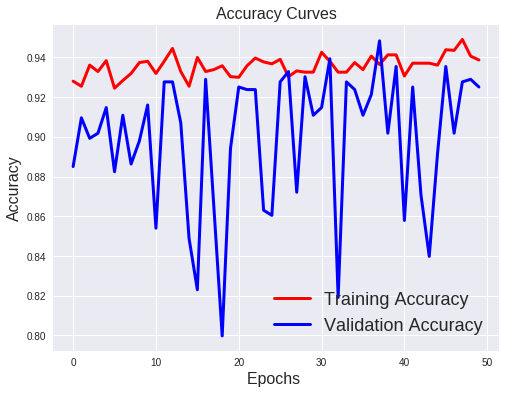

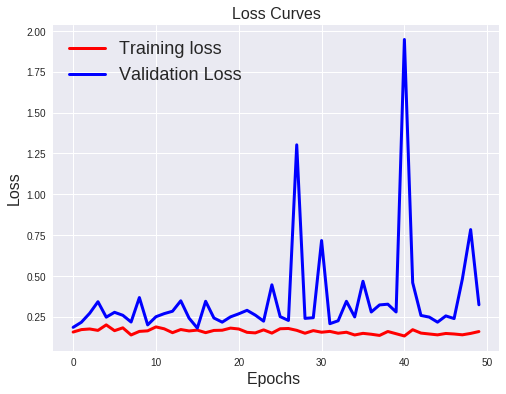

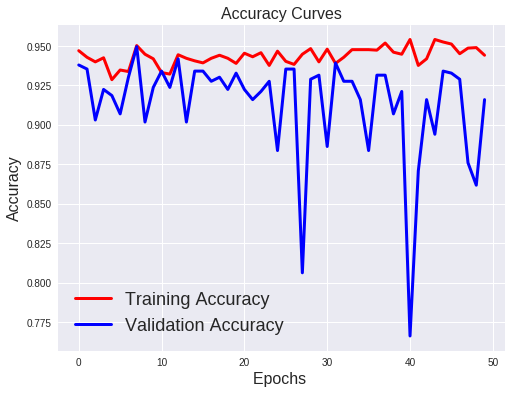

In [0]:
for i in range (5):
  history = pickleLoadFile("/content/drive/My Drive/GUC/Semester 9/ML/Project 3/Model2/Weights/finalModels/hist"+str(i+1)+".pickle")
  # Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['acc'],'r',linewidth=3.0)
  plt.plot(history.history['val_acc'],'b',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)
  